In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
apogee = pd.read_hdf('/data/jls/GaiaDR2/spectro/APOGEE_input.hdf5')
rave = pd.read_hdf('/data/jls/GaiaDR2/spectro/RAVE_input.hdf5')
galah = pd.read_hdf('/data/jls/GaiaDR2/spectro/GALAH_input.hdf5')
ges = pd.read_hdf('/data/jls/GaiaDR2/spectro/GES_input.hdf5')

In [3]:
apogee = apogee[(apogee.J>-9990.)&(apogee.K>-9990.)]

In [20]:
apogee.ra[apogee.source_id<0.][0],apogee.dec[apogee.source_id<0.][0]

(198.082621, 17.51712)

In [23]:
import sqlutil
from login import wsdbpassword

In [122]:
def grab_cutout(ra, dec):
    p = sqlutil.get('select *, q3c_dist(g.ra, g.dec, %0.9f, %0.9f) as dist from gaia_dr2_aux.gaia_source_2mass_xm as g where q3c_radial_query(g.ra, g.dec, %0.9f, %0.9f, 10./3600.)'%(ra,dec,ra,dec),
                   host='cappc127',
                  user='jason_sanders',
                  password=wsdbpassword,
                  preamb='set enable_seqscan to off; ' +
                  'set enable_mergejoin to off; ' +
                  'set enable_hashjoin to off;',
                  asDict=True,
                  strLength=30)
    return pd.DataFrame.from_dict(p)

def grab_cutout_tm(ra, dec):
    p = sqlutil.get('select *, q3c_dist(g.ra, g.decl, %0.9f, %0.9f) as dist from twomass.psc as g where q3c_radial_query(g.ra, g.decl, %0.9f, %0.9f, 10./3600.) and j_m<16'%(ra,dec,ra,dec),
                   host='cappc127',
                  user='jason_sanders',
                  password=wsdbpassword,
                  preamb='set enable_seqscan to off; ' +
                  'set enable_mergejoin to off; ' +
                  'set enable_hashjoin to off;',
                  asDict=True,
                  strLength=30)
    return pd.DataFrame.from_dict(p)

9.066
0    11.7288
Name: phot_g_mean_mag, dtype: float32 0    6.747536
Name: dist, dtype: float64
0    9.066
Name: j_m, dtype: float32 0    0.0
Name: dist, dtype: float64


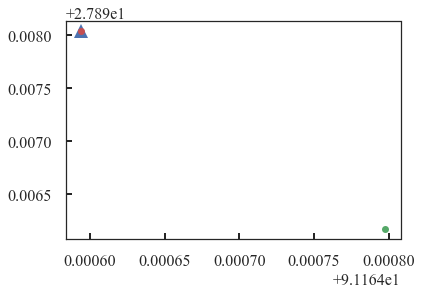

In [123]:
xx=150
print apogee.J[apogee.source_id<0.][xx]
p=grab_cutout(apogee.ra[apogee.source_id<0.][xx],apogee.dec[apogee.source_id<0.][xx])
print p.phot_g_mean_mag,p.dist*3600.
plt.plot(apogee.ra[apogee.source_id<0.][xx],apogee.dec[apogee.source_id<0.][xx],'^')
plt.plot(p.ra,p.dec,'.')
p=grab_cutout_tm(apogee.ra[apogee.source_id<0.][xx],apogee.dec[apogee.source_id<0.][xx])
print p.j_m,p.dist*3600.
plt.plot(p.ra,p.decl,'.')

6.908
0    7.72844
Name: phot_g_mean_mag, dtype: float32 0    0.596765
Name: dist, dtype: float64


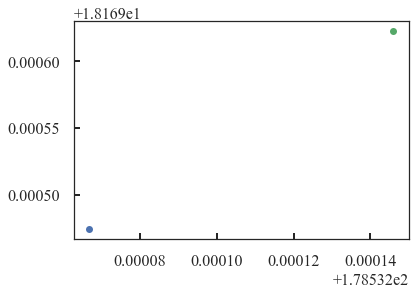

In [80]:
xx=25
print apogee.J[apogee.source_id>0.][xx]
p=grab_cutout(apogee.ra[apogee.source_id>0.][xx],apogee.dec[apogee.source_id>0.][xx])
print p.phot_g_mean_mag,p.dist*3600.
plt.plot(p.ra,p.dec,'.')
plt.plot(apogee.ra[apogee.source_id>0.][xx],apogee.dec[apogee.source_id>0.][xx],'.')

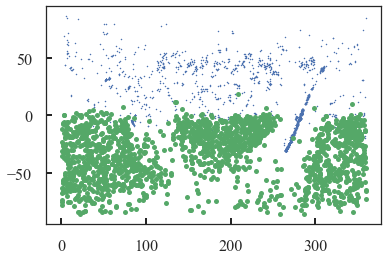

In [17]:
plt.plot(apogee.ra[apogee.source_id<0.],apogee.dec[apogee.source_id<0.],'.',ms=3)
plt.plot(rave.ra[rave.source_id<0.],rave.dec[rave.source_id<0.],'.',ms=10)

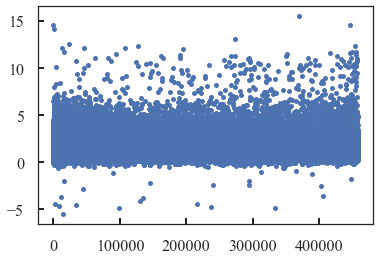

In [57]:
plt.plot(rave.G-rave.J,'.',ms=10)

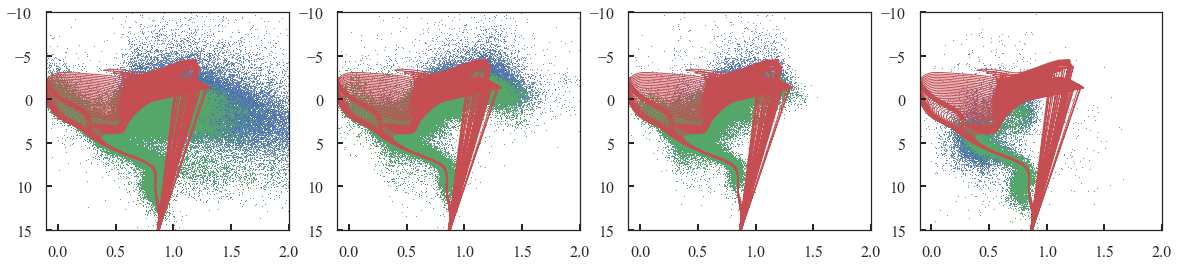

In [6]:
f,a=plt.subplots(1,4,figsize=[20.,4.])

for i,survey in enumerate([apogee,rave,galah,ges]):
    plt.sca(a[i])
    Jfld,Kfld='J','K'
    if i==3:
        Jfld,Kfld='Jv','Kv'
    plt.plot(survey[Jfld]-survey[Kfld],
             survey.G-5.*np.log10(100./survey.parallax),'.',ms=2)
    fltr = survey.parallax/survey.parallax_error>5.
    plt.plot((survey[Jfld]-survey[Kfld])[fltr],
             (survey.G-5.*np.log10(100./survey.parallax))[fltr],'.',ms=2)
    plt.xlim(-.1,2.)
    plt.ylim(15.,-10.)
    plt.plot((s.T[8]-s.T[10])[s.T[1]>8.],g.T[8][s.T[1]>8.],lw=1)

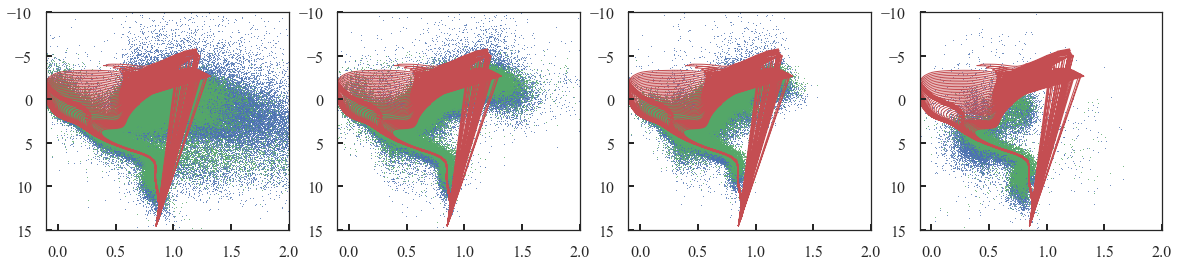

In [104]:
f,a=plt.subplots(1,4,figsize=[20.,4.])

for i,survey in enumerate([apogee,rave,galah,ges]):
    plt.sca(a[i])
    Jfld,Kfld='J','K'
    if i==3:
        Jfld,Kfld='Jv','Kv'
    plt.plot(survey[Jfld]-survey[Kfld],
             survey.G-5.*np.log10(100./survey.parallax),'.',ms=2)
    fltr = survey.parallax/survey.parallax_error>5.
    plt.plot((survey[Jfld]-survey[Kfld])[fltr],
             (survey.GRP-5.*np.log10(100./survey.parallax))[fltr],'.',ms=2)
    plt.xlim(-.1,2.)
    plt.ylim(15.,-10.)
    plt.plot((s.T[8]-s.T[10])[s.T[1]>8.],g.T[10][s.T[1]>8.],lw=1)
    

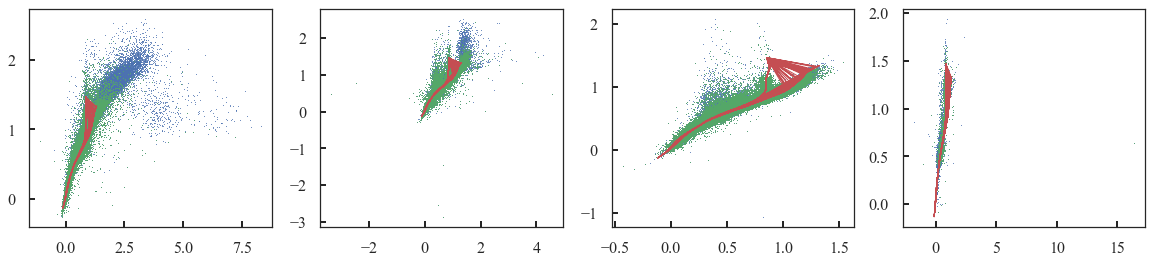

In [101]:
f,a=plt.subplots(1,4,figsize=[20.,4.])

for i,survey in enumerate([apogee,rave,galah,ges]):
    plt.sca(a[i])
    Jfld,Kfld='J','K'
    if i==3:
        Jfld,Kfld='Jv','Kv'
    plt.plot(survey[Jfld]-survey[Kfld],
             survey.G-survey.GRP,'.',ms=2)
    fltr = survey.parallax/survey.parallax_error>5.
    plt.plot((survey[Jfld]-survey[Kfld])[fltr],
             (survey.G-survey.GRP)[fltr],'.',ms=2)
#     plt.xlim(-.1,2.)
#     plt.ylim(15.,-10.)
    plt.plot((s.T[8]-s.T[10])[s.T[1]>8.],(g.T[8]-g.T[10])[s.T[1]>8.],lw=1)
    

In [5]:
g = np.genfromtxt('/data/jls/isochrones/PARSEC_Gaia/grid/gaia_0.003.dat')
s = np.genfromtxt('/data/jls/isochrones/PARSEC_Gaia/grid/2mass_spitzer_wise_0.003.dat')

In [74]:
!head -15 /data/jls/isochrones/PARSEC_Gaia/grid/gaia_0.003.dat
!head -15 /data/jls/isochrones/PARSEC_Gaia/grid/2mass_spitzer_wise_0.003.dat

# File generated by CMD 3.0 (http://stev.oapd.inaf.it/cmd) on Mon Mar 19 16:49:29 CET 2018
# PARSEC isochrones, release v1.2S
# Basic references: Bressan et al. (2012), MNRAS, 427, 127 + Chen et al. (2014, 2015), MNRAS, 444, 2525 + MNRAS, 452, 1068 + Tang et al. (2014), MNRAS, 445, 4287
# Warning: you choose not to include the TP-AGB phase!
# Photometric system: Gaia's DR2 G, G_BP and G_RP (Vegamags)
# Using NBC version of bolometric corrections as in Chen et al. (2014), MNRAS, 444, 2525
# BCs of Carbon stars derive from Aringer et al. (2009, A&A 503, 913)
# O-rich circumstellar dpmod60alox40 dust from Groenewegen (2006)
# C-rich circumstellar AMCSIC15 dust from Groenewegen (2006)
# IMF: Chabrier (2001) lognormal 
# On RGB, assumed Reimers mass loss with efficiency eta=0.2
# Kind of output: isochrone tables
#	Isochrone  Z = 0.01479	Y = 0.27470	[M/H] = 0.003	eta_R = 0.200	Age = 	3.9811e+06 yr
#      Z	log(age/yr)	M_ini   	M_act	logL/Lo	logTe	logG	mbol    G       G_BP    G_RP	int_IMF	sta

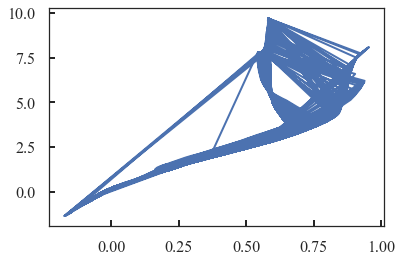

In [90]:
plt.plot(s.T[8]-s.T[9],g.T[9]-s.T[9])

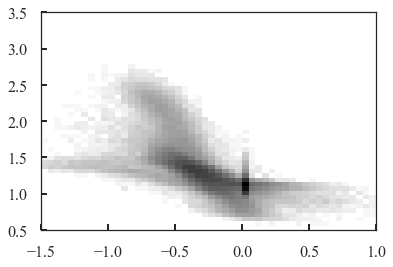

In [111]:
from matplotlib.colors import LogNorm
plt.hist2d((apogee.C_M-apogee.N_M),
            apogee.mass,bins=50,norm=LogNorm(),range=[[-1.5,1.],[0.5,3.5]]);